In [1]:
# Cheking the version of the tesorflow and keras and other libraries
import tensorflow as tf
from tensorflow import keras
print(tf.__version__, keras.__version__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

2.1.0 2.2.4-tf


## Building an Image Classifier Using the Sequential API

In [2]:
# using the digits mnist dataset from keras
digits_mnist = keras.datasets.mnist
(X_train_full , y_train_full ) , (X_test, y_test) = digits_mnist.load_data()

In [3]:
# Shape of the dataset and its type
X_train_full.shape , X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
# Now a single image is consists of an 28x28 array where each pixel is either represented with an 
# pixel density of 0 as black and 255 as white.. since we are going to use gradient descent we have 
# to scale the input feautures by diving them by 255
len(X_test[0])

28

In [5]:
# Creating a validation set and scaling the input features
X_valid , X_train = X_train_full[:5000] / 255 , X_train_full[5000:] / 255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [6]:
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']
class_names

['zero',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine']

In [7]:
class_names[y_train[0]], y_train[0]

('seven', 7)

In [8]:
# BUilding an sequential API model (A Classification MLP with tow hidden layers)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # adding the input layer
model.add(keras.layers.Dense(300, activation='relu')) # Adding the first hidden layer
model.add(keras.layers.Dense(100, activation='relu')) # Adding the second hidden layer
model.add(keras.layers.Dense(10, activation='softmax')) # Adding the final output layer having the softmax as the activation system for the classification problem


### Explanation
* Sequential model is the simplest model in keras for neural networks , just composed of single stack of layers connected squentially called Sequential API
* Flatten is used to convert the each input pixel in the 28x28 to one single array (i.e X.reshape(-1,1)
* Dense is the hidden layer with 300 neurons 
#### Note : You can even pass them on as a string

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
#  Extracting the weigths and biases of the hidden layers
hidden1 = model.layers[1] # Extracting info about the first layer
weights , biases = hidden1.get_weights()
# Notice at first the weights are assigned randomly to each neuron to break the symmetry
weights , weights.shape

(array([[-0.01331158, -0.01871805,  0.04180969, ...,  0.01761489,
         -0.03502854,  0.05682522],
        [ 0.06481843,  0.05252172,  0.01361334, ..., -0.06372177,
          0.06566142,  0.04246013],
        [ 0.04913201, -0.03714048, -0.01133374, ...,  0.06032443,
         -0.01345306,  0.04187726],
        ...,
        [-0.01339297, -0.0368528 ,  0.04961535, ...,  0.01418798,
         -0.06266576, -0.06632394],
        [ 0.06196637,  0.01309104,  0.06695305, ...,  0.03140976,
          0.04946829,  0.03286466],
        [ 0.02464087,  0.06521413,  0.06846291, ..., -0.06744361,
         -0.00114317, -0.0673592 ]], dtype=float32),
 (784, 300))

In [11]:
# All the biases are initialized to zero
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

### Compiling the model
* After the model is created , you must call compile() . to spcify the loss function ans the optimizer to use. and other metrics to compute during the training and evaluation.


In [12]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

### Explanation
* `sparse_categorical_crossentropy` - loss is used coz we have sparse labels , for each instance there is just one target index from 0 to 9 in this case . and the classes are exclusive.
* IF we had one hot encoded vectors ex.[0,0,0,1,0,...] to represent class 3 then we had to use  `"categorical_crossentropy"` loss instead
* For binary classification with more than one binary labels . we use `sigmoid` i.e logistic activation in the output intead of the "softmax" activitation function , `binary_crossentropy` loss instead 

In [13]:
### `sgd` -> Stochastic Gradient Descent and the learning rate is defaulted to lr=0.01 

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 54us/sample - loss: 1.0588 - accuracy: 0.7423 - val_loss: 0.5078 - val_accuracy: 0.8754
Epoch 2/100
55000/55000 [==============================] - 2s 40us/sample - loss: 0.4370 - accuracy: 0.8830 - val_loss: 0.3572 - val_accuracy: 0.9092
Epoch 3/100
55000/55000 [==============================] - 2s 40us/sample - loss: 0.3508 - accuracy: 0.9022 - val_loss: 0.3066 - val_accuracy: 0.9192
Epoch 4/100
55000/55000 [==============================] - 2s 40us/sample - loss: 0.3107 - accuracy: 0.9117 - val_loss: 0.2769 - val_accuracy: 0.9230
Epoch 5/100
55000/55000 [==============================] - 2s 40us/sample - loss: 0.2839 - accuracy: 0.9186 - val_loss: 0.2545 - val_accuracy: 0.9290
Epoch 6/100
55000/55000 [==============================] - 2s 39us/sample - loss: 0.2631 - accuracy: 0.9249 - val_loss: 0.2370 - val_accuracy: 0.9344
Epoch 7/100
55000/55000 [==========================

Epoch 55/100
55000/55000 [==============================] - 2s 29us/sample - loss: 0.0551 - accuracy: 0.9858 - val_loss: 0.0800 - val_accuracy: 0.9790
Epoch 56/100
55000/55000 [==============================] - 2s 29us/sample - loss: 0.0539 - accuracy: 0.9860 - val_loss: 0.0804 - val_accuracy: 0.9782
Epoch 57/100
55000/55000 [==============================] - 2s 29us/sample - loss: 0.0526 - accuracy: 0.9864 - val_loss: 0.0795 - val_accuracy: 0.9786
Epoch 58/100
55000/55000 [==============================] - 2s 29us/sample - loss: 0.0517 - accuracy: 0.9867 - val_loss: 0.0780 - val_accuracy: 0.9786
Epoch 59/100
55000/55000 [==============================] - 2s 29us/sample - loss: 0.0506 - accuracy: 0.9873 - val_loss: 0.0774 - val_accuracy: 0.9792
Epoch 60/100
55000/55000 [==============================] - 2s 29us/sample - loss: 0.0494 - accuracy: 0.9872 - val_loss: 0.0767 - val_accuracy: 0.9788
Epoch 61/100
55000/55000 [==============================] - 2s 28us/sample - loss: 0.0485 - ac

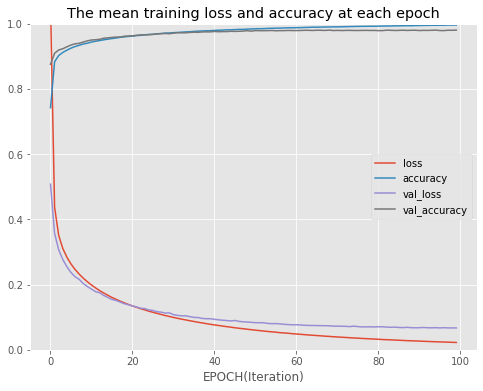

In [14]:
## Training and evaluating the model
# Call back for saving the best model 
checkpoint_cb_best_model = keras.callbacks.ModelCheckpoint('Digits_Sequantial_API.h5',
                                                              save_best_only=True)

# Early stopping the model , if validation accuracy does not see any improvement 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

# This stops the algorithm if its accuracy does not increase at a patience threhold of 10 
history = model.fit(X_train, y_train, epochs=100,
                   validation_data = (X_valid, y_valid),
                   callbacks=[checkpoint_cb_best_model, early_stopping_cb],
                   batch_size=100)
#  Instead of creating a validation data and passing it other wise we could also set the 
# validation_split=0.1 (10%) tell keras to use 10% of the data for validation
# class_weight gives more weight to underpresent clasees and vice versa
# Use batch_size to change the number of samples per gradient descent default = 32
# Using history parameter
plt.style.use('ggplot')
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.title('The mean training loss and accuracy at each epoch')
plt.xlabel('EPOCH(Iteration)')
plt.grid(True)
plt.gca().set_ylim(0,1) # Set the vertical range to [0-1]
plt.show()

In [15]:
## Evaluating the model on the test data
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 13.1126 - accuracy: 0.9744


[13.112643292152882, 0.9744]

In [16]:
# Using the model to make prediction
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [17]:
# As you can see the for each instance the model estimates one probability per class from 0 to 9
# ex. in the second case its prob is 100% on index 2 meaning the value is 2 
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
# To find the classes with the highest probability use predict_classes
y_pred = model.predict_classes(X_new)
y_pred
y_pred_string = np.array(class_names)[y_pred]
y_pred_string               # to use y_pred as index to the class_name list

array(['seven', 'two', 'one'], dtype='<U5')

In [19]:
# Here are the actual values of the images using the test set
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

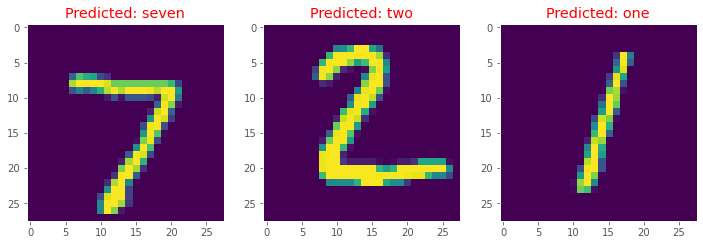

In [20]:
# Here we can see the image with the value it has predicted
fig, ax = plt.subplots(1,3,figsize=(12,6))
for axs,j,k in zip(ax.flat,X_new[:3],[0,1,2]):
    axs.imshow(j)
    axs.grid(False,)
    axs.set_title(f'Predicted: {y_pred_string[k]}',color='red')
plt.show()

In [21]:
# Now lets create a function which will ask for a random number pixel in the test dataset
# and will return its test_data pixel image and the value predicted for it
def get_image(model, X_test, class_names):
    inp = input(f'Input a random index value from the test dataset less than  {len(X_test)} : ' )
    try:
        inp = int(inp)
    except :
        print('The value given is not an integer ')
    if inp > 100000:
        print('The number is greater than 100000')
    else:
        X_new = X_test[inp:inp+1]
        y_pred = model.predict_classes(X_new)
        y_pred_string = np.array(class_names)[y_pred]
        plt.imshow(X_new[0])
        plt.grid(False,)
        plt.title(f'Predicted: {y_pred_string}',color='red')
        plt.show()


Input a random index value from the test dataset less than  10000 : 454


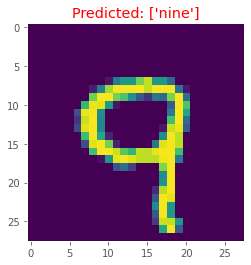

In [22]:
# Calling the function for different with inputting different values of index 
get_image(model, X_test, class_names)